# Optimizing Neural Network Architectures for Wine Quality Prediction

## Objective
The objective of this project is to develop and optimize various neural network architectures to predict the quality of wine based on its chemical properties. By experimenting with different network configurations, the goal is to identify the most accurate model for wine quality classification, ultimately achieving a high level of predictive accuracy.

## Steps Involved in the Project

1. **Data Loading and Preprocessing:**
   - Load the wine quality dataset.
   - Separate features and target variable.
   - Map target variable for one-hot encoding.

2. **Exploratory Data Analysis (EDA):**
   - Plot distributions of each chemical property.
   - Analyze the distribution of wine quality.

3. **Model Development:**
   - Define and compile various neural network models with different architectures.
   - Train each model on the dataset.
   - Evaluate the performance of each model.

4. **Model Evaluation:**
   - Make predictions with each model.
   - Compare predictions with actual values.
   - Calculate accuracy and generate classification reports.

5. **Model Optimization:**
   - Experiment with different numbers of hidden layers and neurons.
   - Identify the architecture that provides the best accuracy.

6. **Visualization:**
   - Plot training loss and accuracy over epochs for the best-performing model.

### Data Loading and Preprocessing:

The dataset contains 1,599 instances with 12 features each. The features include various chemical properties of red wine, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and the target variable, quality. The quality score ranges from 3 to 8, which we will predict based on the other features.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
wines = pd.read_csv('winequality-red.csv')
wines.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Exploratory Data Analysis (EDA):

First let's see the set of plots of the distributions of features and plot illustrates the distribution of wine quality scores

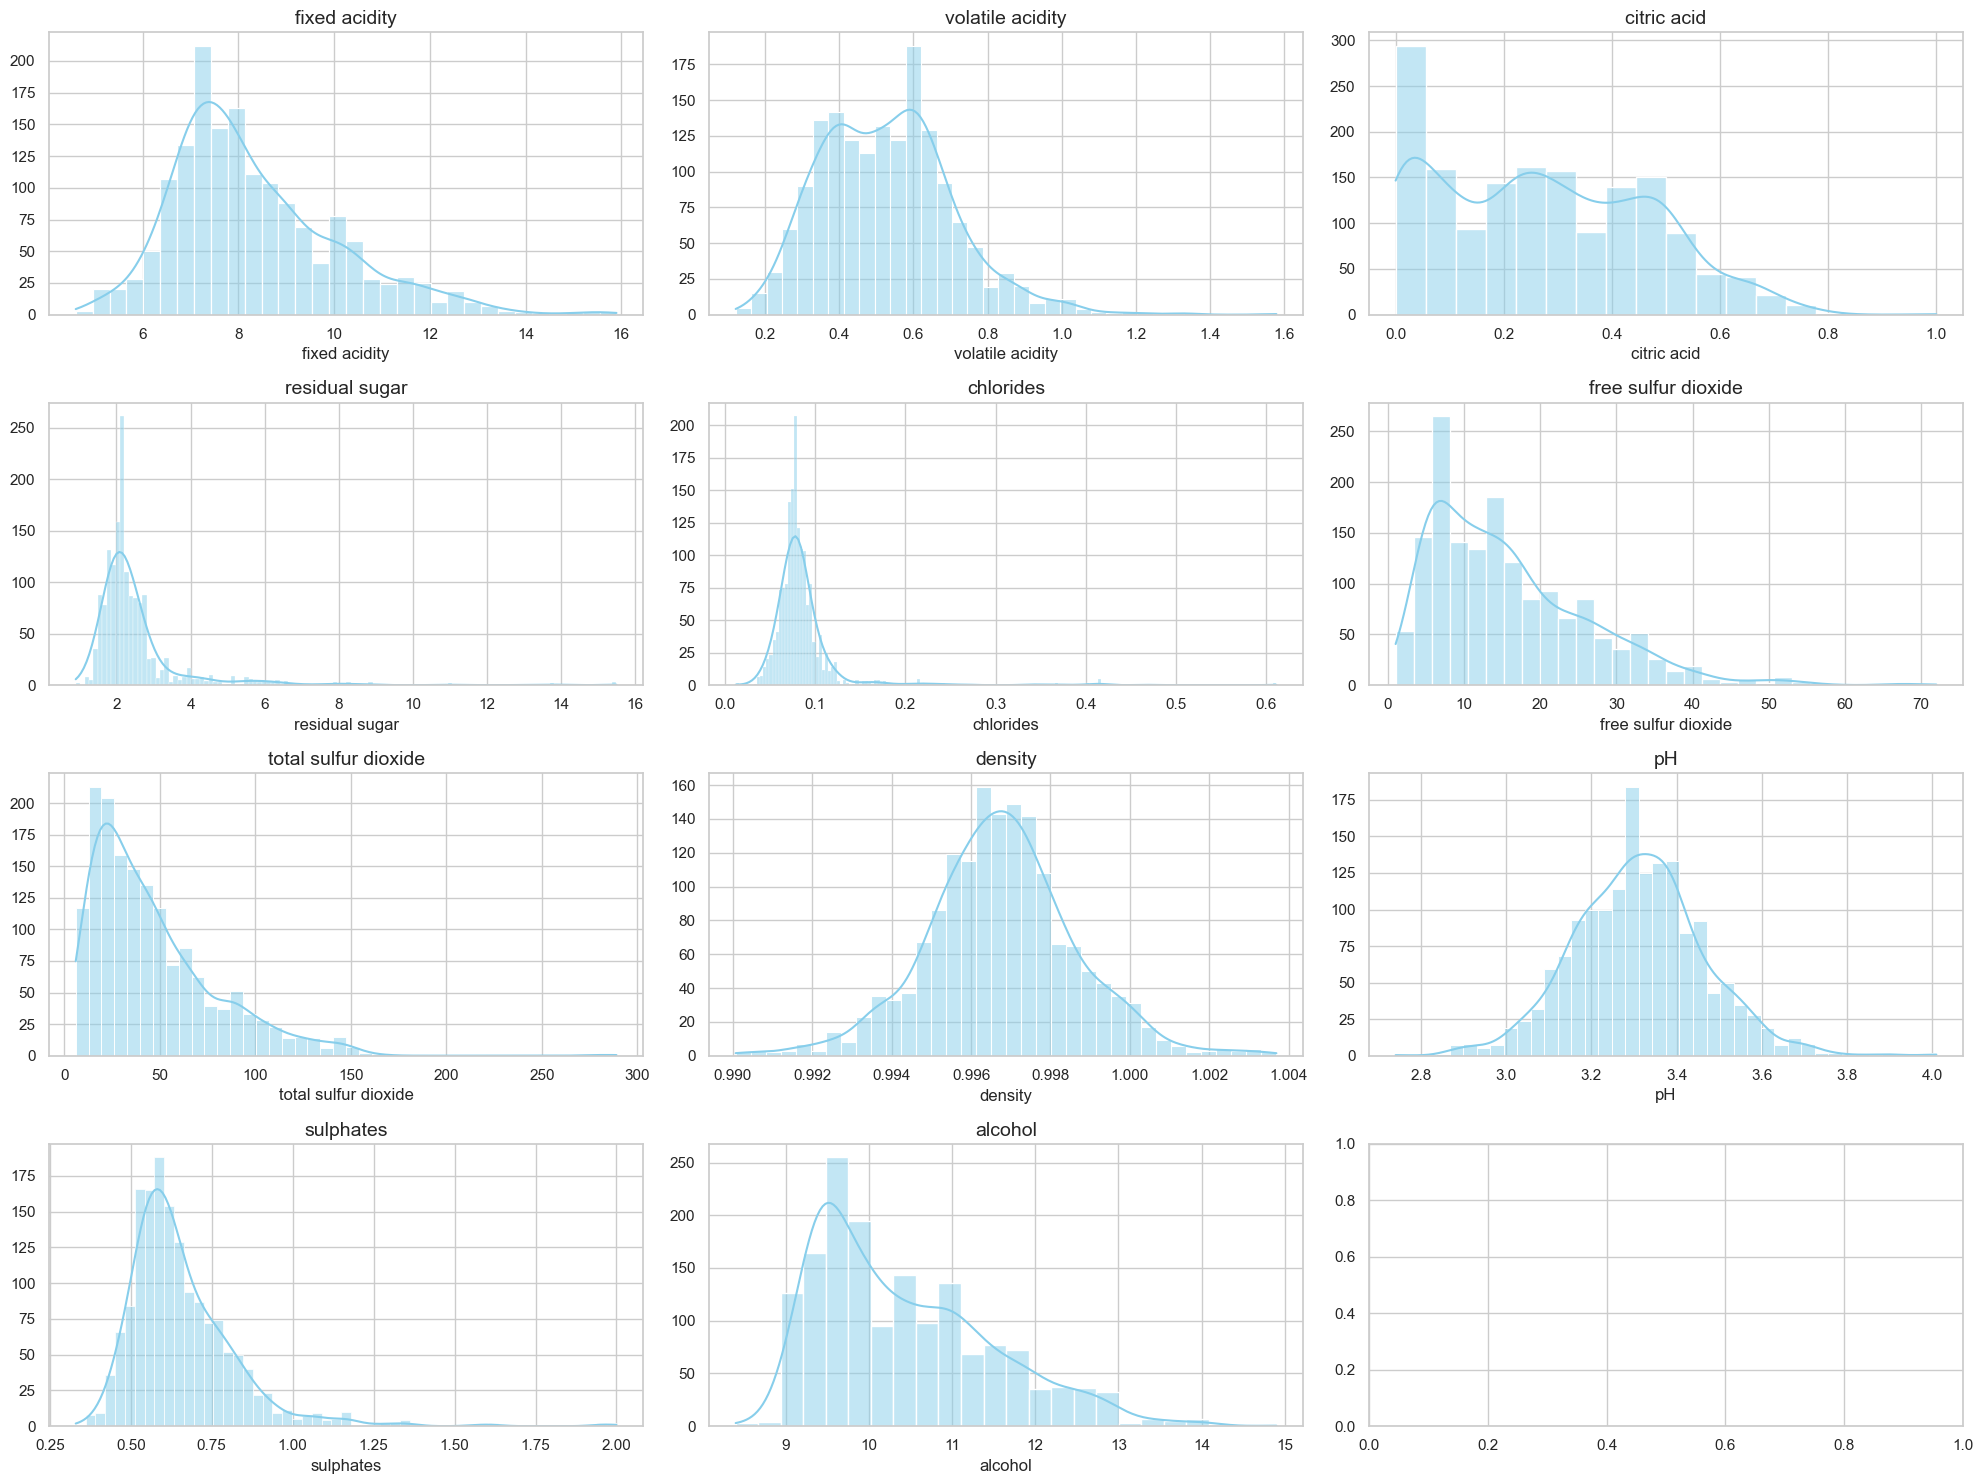

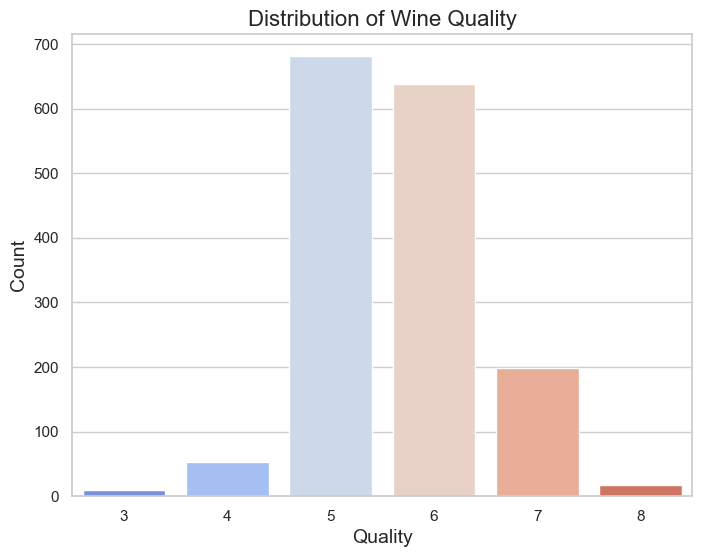

In [22]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting distributions of each feature
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
fig.subplots_adjust(hspace = 0.5, wspace=.3)

axs = axs.flatten()

for i, col_name in enumerate(wines.columns[:-1]): # Exclude 'quality' column for this distribution plot
    sns.histplot(wines[col_name], kde=True, ax=axs[i], color='skyblue')
    axs[i].set_title(col_name, fontsize=14)
    axs[i].set_ylabel('')

plt.tight_layout()
plt.show()

# distribution of 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wines, palette='coolwarm')
plt.title('Distribution of Wine Quality', fontsize=16)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


Data Preparation for model training

In [4]:
X_train = wines.drop('quality', axis=1).values.astype(float)
y_train = wines['quality']

In [5]:
# Input variables
X_train

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [6]:
# Target variable
y_train

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [7]:
import numpy as np

# Assuming y_train is a NumPy array
unique_classes = np.unique(y_train)
print("Unique classes:", unique_classes)

Unique classes: [3 4 5 6 7 8]


**Target Conversion to Categorical:**
- Let's Map quality scores to start from 0
- For classification tasks, especially multiclass classification, the target variable must be in a format suitable for the model to learn effectively. One-hot encoding transforms the target into a binary matrix representation where each class is represented by a binary vector of 0s except for the class's index, which is marked as 1.

In [8]:
from tensorflow.keras.utils import to_categorical

# Map quality scores to start from 0
y_mapped = y_train - y_train.min()

# Convert mapped quality scores to one-hot
y_categorical = to_categorical(y_mapped).astype(int)
y_categorical

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]])

Now, Lets check the spae of the data

In [9]:
X_train.shape, y_categorical.shape

((1599, 11), (1599, 6))

In [10]:
import tensorflow as tf
tf.__version__

'2.15.0'

### NN Model 1 (Only one hidden layer & parameters as in the model)

Before starting the model, two parameters are clearly know what to choose as per the data

**Loss function: Categorical Crossentropy**

- For multiclass classification tasks, It measures the dissimilarity between the predicted probability distribution over the classes and the true distribution (where the true class has probability 1 and all others have 0). The goal of training is to minimize this dissimilarity, thus improving the model's predictions.
- As target variable (labels) are one-hot encoded meaning each label is represented as a binary vector of the same length as the number of classes for categorical crossentropy to work correctly. This means that each label has been represented as a vector that is all zeros except for a single one at the index of the true class.

**Output layer's Activation Function: softmax**

- In multiclass classification tasks, where each input can be classified into one among more than two possible classes (e.g., types of fruits), the softmax activation function is used. Softmax converts the output scores from the model into probability distributions across the classes, where the sum of probabilities for all classes is 1. The class with the highest probability is taken as the model's prediction.


#### Model Development:

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_classes = y_categorical.shape[1]  # Number of unique quality scores

model = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(num_classes, activation='softmax')  # Output layer for multiclass classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_categorical, epochs=1000, batch_size=30)

Epoch 1/1000


54/54 [==============================] - 2s 4ms/step - loss: 3.9015 - accuracy: 0.2896
Epoch 2/1000
54/54 [==============================] - 0s 3ms/step - loss: 1.5400 - accuracy: 0.4559
Epoch 3/1000
54/54 [==============================] - 0s 4ms/step - loss: 1.3304 - accuracy: 0.4853
Epoch 4/1000
54/54 [==============================] - 0s 3ms/step - loss: 1.2679 - accuracy: 0.4966
Epoch 5/1000
54/54 [==============================] - 0s 4ms/step - loss: 1.2222 - accuracy: 0.4891
Epoch 6/1000
54/54 [==============================] - 0s 4ms/step - loss: 1.1890 - accuracy: 0.4966
Epoch 7/1000
54/54 [==============================] - 0s 4ms/step - loss: 1.1640 - accuracy: 0.4984
Epoch 8/1000
54/54 [==============================] - 0s 4ms/step - loss: 1.1536 - accuracy: 0.4959
Epoch 9/1000
54/54 [==============================] - 0s 4ms/step - loss: 1.1331 - accuracy: 0.5216
Epoch 10/1000
54/54 [==============================] - 0s 4ms/step - loss: 1.1233 - accuracy: 0.51

54/54 [==============================] - 0s 3ms/step - loss: 0.9384 - accuracy: 0.6066
Epoch 158/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.9439 - accuracy: 0.5972
Epoch 159/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.9353 - accuracy: 0.6048
Epoch 160/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.9398 - accuracy: 0.5960
Epoch 161/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.9422 - accuracy: 0.6004
Epoch 162/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.9303 - accuracy: 0.6054
Epoch 163/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.9425 - accuracy: 0.5972
Epoch 164/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.9328 - accuracy: 0.5979
Epoch 165/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.9359 - accuracy: 0.5904
Epoch 166/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.9309 - accuracy: 0.

54/54 [==============================] - 0s 4ms/step - loss: 0.9163 - accuracy: 0.5966
Epoch 318/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8991 - accuracy: 0.6035
Epoch 319/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8978 - accuracy: 0.6110
Epoch 320/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8964 - accuracy: 0.6091
Epoch 321/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.9002 - accuracy: 0.6179
Epoch 322/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.9090 - accuracy: 0.6085
Epoch 323/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8942 - accuracy: 0.6160
Epoch 324/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8976 - accuracy: 0.6173
Epoch 325/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.9178 - accuracy: 0.6016
Epoch 326/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8959 - accuracy: 0.

54/54 [==============================] - 0s 4ms/step - loss: 0.8990 - accuracy: 0.6116
Epoch 478/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8962 - accuracy: 0.6079
Epoch 479/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8903 - accuracy: 0.6141
Epoch 480/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8856 - accuracy: 0.6166
Epoch 481/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8809 - accuracy: 0.6235
Epoch 482/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8857 - accuracy: 0.6223
Epoch 483/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8814 - accuracy: 0.6229
Epoch 484/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8789 - accuracy: 0.6241
Epoch 485/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8907 - accuracy: 0.6191
Epoch 486/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8869 - accuracy: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.8762 - accuracy: 0.6098
Epoch 638/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8952 - accuracy: 0.6135
Epoch 639/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8724 - accuracy: 0.6123
Epoch 640/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8787 - accuracy: 0.6241
Epoch 641/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8755 - accuracy: 0.6254
Epoch 642/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8740 - accuracy: 0.6229
Epoch 643/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8835 - accuracy: 0.6260
Epoch 644/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8827 - accuracy: 0.6185
Epoch 645/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8805 - accuracy: 0.6154
Epoch 646/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8783 - accuracy: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.8803 - accuracy: 0.6141
Epoch 798/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8788 - accuracy: 0.6235
Epoch 799/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8729 - accuracy: 0.6235
Epoch 800/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8752 - accuracy: 0.6335
Epoch 801/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8725 - accuracy: 0.6198
Epoch 802/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8717 - accuracy: 0.6204
Epoch 803/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8720 - accuracy: 0.6160
Epoch 804/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8685 - accuracy: 0.6254
Epoch 805/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8687 - accuracy: 0.6241
Epoch 806/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8753 - accuracy: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.8697 - accuracy: 0.6210
Epoch 958/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8697 - accuracy: 0.6360
Epoch 959/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8649 - accuracy: 0.6173
Epoch 960/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8615 - accuracy: 0.6248
Epoch 961/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8714 - accuracy: 0.6229
Epoch 962/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8717 - accuracy: 0.6204
Epoch 963/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8671 - accuracy: 0.6229
Epoch 964/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8799 - accuracy: 0.6298
Epoch 965/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.8647 - accuracy: 0.6216
Epoch 966/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.8643 - accuracy: 0.

#### Model Evaluation:

In [9]:
# Make predictions with the model
predictions_categorical = model.predict(X_train)

# Convert predictions from one-hot encoded format back to original label format
# The `argmax` method finds the index of the maximum value along axis 1 (across columns),
# which corresponds to the predicted class. add `y_train.min()` to map it back to the original range.
predictions = np.argmax(predictions_categorical, axis=1) + y_train.min()

# Convert `y_train` to a numpy array for easier comparison
y_train_array = np.array(y_train)

# Compare predictions with actual values
for i in range(10):
    print(f"Actual: {y_train_array[i]}, Predicted: {predictions[i]}")

50/50 [==============================] - 0s 3ms/step
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 6, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 7, Predicted: 5
Actual: 7, Predicted: 5
Actual: 5, Predicted: 5


In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy using scikit-learn's function
accuracy_sklearn = accuracy_score(y_train_array, predictions)
print(f"Accuracy (scikit-learn): {accuracy_sklearn:.2f}")

# classification report
print("\nClassification Report:")
print(classification_report(y_train_array, predictions))

Accuracy (scikit-learn): 0.63

Classification Report:
              precision    recall  f1-score   support

           3       0.67      0.20      0.31        10
           4       0.43      0.06      0.10        53
           5       0.67      0.76      0.71       681
           6       0.58      0.63      0.60       638
           7       0.62      0.39      0.48       199
           8       0.00      0.00      0.00        18

    accuracy                           0.63      1599
   macro avg       0.49      0.34      0.37      1599
weighted avg       0.61      0.63      0.61      1599



C:\Users\91833\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91833\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91833\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# y_train_array contains the actual labels and predictions contains the predicted labels from your model
accuracy_percentage = accuracy_score(y_train_array, predictions) * 100

print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Model Accuracy: 62.60%


### NN Model 2 (Two hidden layers & parameters as in the model)

#### Model Development:

In [12]:
num_classes = y_categorical.shape[1]  # Number of unique quality scores

model = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for multiclass classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_categorical, epochs=1000, batch_size=32)

Epoch 1/1000
50/50 [==============================] - 2s 4ms/step - loss: 1.9307 - accuracy: 0.4078
Epoch 2/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1786 - accuracy: 0.4665
Epoch 3/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1515 - accuracy: 0.4947
Epoch 4/1000
50/50 [==============================] - 0s 5ms/step - loss: 1.1448 - accuracy: 0.5028
Epoch 5/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1288 - accuracy: 0.5059
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1250 - accuracy: 0.5109
Epoch 7/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1310 - accuracy: 0.5078
Epoch 8/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1251 - accuracy: 0.4878
Epoch 9/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1016 - accuracy: 0.5253
Epoch 10/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.0971 - accuracy: 0.5291

50/50 [==============================] - 0s 4ms/step - loss: 0.8578 - accuracy: 0.6373
Epoch 163/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.8628 - accuracy: 0.6329
Epoch 164/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8651 - accuracy: 0.6366
Epoch 165/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.8632 - accuracy: 0.6329
Epoch 166/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8625 - accuracy: 0.6316
Epoch 167/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8666 - accuracy: 0.6298
Epoch 168/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8599 - accuracy: 0.6354
Epoch 169/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8619 - accuracy: 0.6385
Epoch 170/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8650 - accuracy: 0.6285
Epoch 171/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8572 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.8110 - accuracy: 0.6504
Epoch 323/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8120 - accuracy: 0.6523
Epoch 324/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8211 - accuracy: 0.6492
Epoch 325/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8098 - accuracy: 0.6492
Epoch 326/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8129 - accuracy: 0.6579
Epoch 327/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8209 - accuracy: 0.6429
Epoch 328/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8102 - accuracy: 0.6504
Epoch 329/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8224 - accuracy: 0.6498
Epoch 330/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8099 - accuracy: 0.6504
Epoch 331/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8125 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.7831 - accuracy: 0.6710
Epoch 483/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7809 - accuracy: 0.6710
Epoch 484/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7921 - accuracy: 0.6617
Epoch 485/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7783 - accuracy: 0.6592
Epoch 486/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7920 - accuracy: 0.6498
Epoch 487/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7956 - accuracy: 0.6510
Epoch 488/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7827 - accuracy: 0.6598
Epoch 489/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7802 - accuracy: 0.6585
Epoch 490/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7783 - accuracy: 0.6573
Epoch 491/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7951 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.7606 - accuracy: 0.6673
Epoch 643/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7572 - accuracy: 0.6723
Epoch 644/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7638 - accuracy: 0.6704
Epoch 645/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7574 - accuracy: 0.6767
Epoch 646/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7595 - accuracy: 0.6742
Epoch 647/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7625 - accuracy: 0.6667
Epoch 648/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7687 - accuracy: 0.6617
Epoch 649/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7579 - accuracy: 0.6723
Epoch 650/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7556 - accuracy: 0.6698
Epoch 651/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7675 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.7411 - accuracy: 0.6723
Epoch 803/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7298 - accuracy: 0.6873
Epoch 804/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7284 - accuracy: 0.6879
Epoch 805/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7280 - accuracy: 0.6954
Epoch 806/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7460 - accuracy: 0.6785
Epoch 807/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7380 - accuracy: 0.6842
Epoch 808/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7366 - accuracy: 0.6767
Epoch 809/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7368 - accuracy: 0.6886
Epoch 810/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7317 - accuracy: 0.6923
Epoch 811/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7347 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.7171 - accuracy: 0.6829
Epoch 963/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7150 - accuracy: 0.6886
Epoch 964/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7125 - accuracy: 0.6954
Epoch 965/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.6936
Epoch 966/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.6979
Epoch 967/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7142 - accuracy: 0.6954
Epoch 968/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7171 - accuracy: 0.6842
Epoch 969/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.6948
Epoch 970/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7146 - accuracy: 0.6923
Epoch 971/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7155 - accuracy: 0.

#### Model Evaluation:

In [13]:
# Make predictions with the model
predictions_categorical = model.predict(X_train)

# Convert predictions from one-hot encoded format back to original label format
# The `argmax` method finds the index of the maximum value along axis 1 (across columns),
# which corresponds to the predicted class. add `y_train.min()` to map it back to the original range.
predictions = np.argmax(predictions_categorical, axis=1) + y_train.min()

# Convert `y_train` to a numpy array for easier comparison
y_train_array = np.array(y_train)

# Compare predictions with actual values
for i in range(10):
    print(f"Actual: {y_train_array[i]}, Predicted: {predictions[i]}")

50/50 [==============================] - 0s 3ms/step
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 6
Actual: 6, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 7, Predicted: 6
Actual: 7, Predicted: 5
Actual: 5, Predicted: 5


In [14]:
# Calculate accuracy using scikit-learn's function
accuracy_sklearn = accuracy_score(y_train_array, predictions)
print(f"Accuracy (scikit-learn): {accuracy_sklearn:.2f}")

# classification report
print("\nClassification Report:")
print(classification_report(y_train_array, predictions))

# y_train_array contains the actual labels and predictions contains the predicted labels from your model
accuracy_percentage = accuracy_score(y_train_array, predictions) * 100

print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Accuracy (scikit-learn): 0.71

Classification Report:
              precision    recall  f1-score   support

           3       0.78      0.70      0.74        10
           4       0.80      0.23      0.35        53
           5       0.72      0.81      0.76       681
           6       0.69      0.68      0.68       638
           7       0.71      0.63      0.67       199
           8       0.86      0.33      0.48        18

    accuracy                           0.71      1599
   macro avg       0.76      0.56      0.61      1599
weighted avg       0.71      0.71      0.70      1599

Model Accuracy: 70.86%


### NN Model 3 (Two hidden layers with increase in number of neurons & parameters as in the model)

#### Model Development:

In [15]:
num_classes = y_categorical.shape[1]  # Number of unique quality scores

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for multiclass classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_categorical, epochs=1000, batch_size=32)

Epoch 1/1000
50/50 [==============================] - 2s 4ms/step - loss: 1.6781 - accuracy: 0.4321
Epoch 2/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1817 - accuracy: 0.4797
Epoch 3/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1701 - accuracy: 0.4797
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1555 - accuracy: 0.4816
Epoch 5/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1327 - accuracy: 0.5203
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1378 - accuracy: 0.5128
Epoch 7/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1201 - accuracy: 0.5166
Epoch 8/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1192 - accuracy: 0.5084
Epoch 9/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1188 - accuracy: 0.5028
Epoch 10/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1034 - accuracy: 0.5166

50/50 [==============================] - 0s 4ms/step - loss: 0.8361 - accuracy: 0.6335
Epoch 163/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.8402 - accuracy: 0.6510
Epoch 164/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8352 - accuracy: 0.6216
Epoch 165/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8577 - accuracy: 0.6191
Epoch 166/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8293 - accuracy: 0.6442
Epoch 167/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8292 - accuracy: 0.6467
Epoch 168/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8782 - accuracy: 0.6160
Epoch 169/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8348 - accuracy: 0.6379
Epoch 170/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8458 - accuracy: 0.6404
Epoch 171/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.8318 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.7655 - accuracy: 0.6692
Epoch 323/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7628 - accuracy: 0.6685
Epoch 324/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7802 - accuracy: 0.6779
Epoch 325/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7783 - accuracy: 0.6617
Epoch 326/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7828 - accuracy: 0.6604
Epoch 327/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7700 - accuracy: 0.6704
Epoch 328/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7563 - accuracy: 0.6679
Epoch 329/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7586 - accuracy: 0.6629
Epoch 330/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7590 - accuracy: 0.6760
Epoch 331/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7792 - accuracy: 0.

50/50 [==============================] - 0s 3ms/step - loss: 0.7100 - accuracy: 0.6911
Epoch 483/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.7017
Epoch 484/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.7073
Epoch 485/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.6873
Epoch 486/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7061 - accuracy: 0.7073
Epoch 487/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.6948
Epoch 488/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7244 - accuracy: 0.6748
Epoch 489/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7142 - accuracy: 0.6923
Epoch 490/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7166 - accuracy: 0.6848
Epoch 491/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.7161
Epoch 643/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.7173
Epoch 644/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.7192
Epoch 645/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.7192
Epoch 646/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.7142
Epoch 647/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.7048
Epoch 648/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.7154
Epoch 649/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6547 - accuracy: 0.7223
Epoch 650/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.7123
Epoch 651/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.

50/50 [==============================] - 0s 5ms/step - loss: 0.6229 - accuracy: 0.7380
Epoch 803/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6193 - accuracy: 0.7336
Epoch 804/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.7361
Epoch 805/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6202 - accuracy: 0.7392
Epoch 806/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6149 - accuracy: 0.7448
Epoch 807/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6148 - accuracy: 0.7423
Epoch 808/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6145 - accuracy: 0.7317
Epoch 809/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6116 - accuracy: 0.7423
Epoch 810/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.7423
Epoch 811/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6229 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.5933 - accuracy: 0.7498
Epoch 963/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5729 - accuracy: 0.7598
Epoch 964/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5850 - accuracy: 0.7561
Epoch 965/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5884 - accuracy: 0.7498
Epoch 966/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5799 - accuracy: 0.7455
Epoch 967/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5803 - accuracy: 0.7598
Epoch 968/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.7624
Epoch 969/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5881 - accuracy: 0.7367
Epoch 970/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5756 - accuracy: 0.7642
Epoch 971/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5754 - accuracy: 0.

#### Model Evaluation:

In [18]:
# Make predictions with the model
predictions_categorical = model.predict(X_train)

# Convert predictions from one-hot encoded format back to original label format
# The `argmax` method finds the index of the maximum value along axis 1 (across columns),
# which corresponds to the predicted class. add `y_train.min()` to map it back to the original range.
predictions = np.argmax(predictions_categorical, axis=1) + y_train.min()

# Convert `y_train` to a numpy array for easier comparison
y_train_array = np.array(y_train)

# Compare predictions with actual values
for i in range(10):
    print(f"Actual: {y_train_array[i]}, Predicted: {predictions[i]}")

50/50 [==============================] - 0s 3ms/step
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 6, Predicted: 6
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 7, Predicted: 6
Actual: 7, Predicted: 5
Actual: 5, Predicted: 5


In [19]:
# Calculate accuracy using scikit-learn's function
accuracy_sklearn = accuracy_score(y_train_array, predictions)
print(f"Accuracy (scikit-learn): {accuracy_sklearn:.2f}")

# classification report
print("\nClassification Report:")
print(classification_report(y_train_array, predictions))

# y_train_array contains the actual labels and predictions contains the predicted labels from your model
accuracy_percentage = accuracy_score(y_train_array, predictions) * 100

print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Accuracy (scikit-learn): 0.77

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.88      0.40      0.55        53
           5       0.76      0.84      0.80       681
           6       0.77      0.71      0.73       638
           7       0.74      0.79      0.77       199
           8       0.92      0.67      0.77        18

    accuracy                           0.77      1599
   macro avg       0.85      0.73      0.77      1599
weighted avg       0.77      0.77      0.76      1599

Model Accuracy: 76.55%


### NN Model 4 (Four hidden layers with increase in number of neurons & parameters as in the model)

#### Model Development:

In [20]:
num_classes = y_categorical.shape[1]  # Number of unique quality scores

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(24, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for multiclass classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_categorical, epochs=1000, batch_size=32)

Epoch 1/1000
50/50 [==============================] - 3s 4ms/step - loss: 1.2142 - accuracy: 0.4897
Epoch 2/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1766 - accuracy: 0.4684
Epoch 3/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1546 - accuracy: 0.4959
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1748 - accuracy: 0.5041
Epoch 5/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1388 - accuracy: 0.4984
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.1241 - accuracy: 0.5028
Epoch 7/1000
50/50 [==============================] - 0s 5ms/step - loss: 1.1083 - accuracy: 0.5153
Epoch 8/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.0898 - accuracy: 0.5228
Epoch 9/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.0975 - accuracy: 0.5178
Epoch 10/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.0924 - accuracy: 0.5272

50/50 [==============================] - 0s 4ms/step - loss: 0.7976 - accuracy: 0.6504
Epoch 163/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7876 - accuracy: 0.6548
Epoch 164/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7954 - accuracy: 0.6554
Epoch 165/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7738 - accuracy: 0.6723
Epoch 166/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7874 - accuracy: 0.6567
Epoch 167/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7634 - accuracy: 0.6679
Epoch 168/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7693 - accuracy: 0.6710
Epoch 169/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7597 - accuracy: 0.6729
Epoch 170/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7818 - accuracy: 0.6685
Epoch 171/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.7718 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.6062 - accuracy: 0.7336
Epoch 323/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5979 - accuracy: 0.7467
Epoch 324/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5915 - accuracy: 0.7480
Epoch 325/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5888 - accuracy: 0.7430
Epoch 326/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5799 - accuracy: 0.7561
Epoch 327/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.7492
Epoch 328/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6155 - accuracy: 0.7442
Epoch 329/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6059 - accuracy: 0.7386
Epoch 330/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.5758 - accuracy: 0.7674
Epoch 331/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.5950 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.4521 - accuracy: 0.8143
Epoch 483/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4366 - accuracy: 0.8193
Epoch 484/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.8130
Epoch 485/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.8168
Epoch 486/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4336 - accuracy: 0.8211
Epoch 487/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4188 - accuracy: 0.8205
Epoch 488/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4328 - accuracy: 0.8311
Epoch 489/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.8230
Epoch 490/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.8049
Epoch 491/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4144 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.3577 - accuracy: 0.8630
Epoch 643/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3357 - accuracy: 0.8618
Epoch 644/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3489 - accuracy: 0.8587
Epoch 645/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3723 - accuracy: 0.8380
Epoch 646/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3473 - accuracy: 0.8524
Epoch 647/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.8549
Epoch 648/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.8336
Epoch 649/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3055 - accuracy: 0.8856
Epoch 650/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.8537
Epoch 651/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3640 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.2534 - accuracy: 0.9024
Epoch 803/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2892 - accuracy: 0.8787
Epoch 804/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4017 - accuracy: 0.8455
Epoch 805/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5481 - accuracy: 0.8024
Epoch 806/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4176 - accuracy: 0.8424
Epoch 807/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3262 - accuracy: 0.8674
Epoch 808/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3117 - accuracy: 0.8680
Epoch 809/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2683 - accuracy: 0.8906
Epoch 810/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2430 - accuracy: 0.9024
Epoch 811/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2618 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.2123 - accuracy: 0.9131
Epoch 963/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 0.9099
Epoch 964/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2365 - accuracy: 0.9068
Epoch 965/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2207 - accuracy: 0.9093
Epoch 966/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.8737
Epoch 967/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2130 - accuracy: 0.9162
Epoch 968/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2167 - accuracy: 0.9068
Epoch 969/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2203 - accuracy: 0.9118
Epoch 970/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1963 - accuracy: 0.9187
Epoch 971/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2015 - accuracy: 0.

#### Model Evaluation:

In [21]:
# Make predictions with the model
predictions_categorical = model.predict(X_train)

# Convert predictions from one-hot encoded format back to original label format
# The `argmax` method finds the index of the maximum value along axis 1 (across columns),
# which corresponds to the predicted class. add `y_train.min()` to map it back to the original range.
predictions = np.argmax(predictions_categorical, axis=1) + y_train.min()

# Convert `y_train` to a numpy array for easier comparison
y_train_array = np.array(y_train)

# Compare predictions with actual values
for i in range(10):
    print(f"Actual: {y_train_array[i]}, Predicted: {predictions[i]}")

50/50 [==============================] - 0s 3ms/step
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 6, Predicted: 6
Actual: 5, Predicted: 5
Actual: 5, Predicted: 6
Actual: 5, Predicted: 5
Actual: 7, Predicted: 7
Actual: 7, Predicted: 7
Actual: 5, Predicted: 5


In [22]:
# Calculate accuracy using scikit-learn's function
accuracy_sklearn = accuracy_score(y_train_array, predictions)
print(f"Accuracy (scikit-learn): {accuracy_sklearn:.2f}")

# classification report
print("\nClassification Report:")
print(classification_report(y_train_array, predictions))

# y_train_array contains the actual labels and predictions contains the predicted labels from your model
accuracy_percentage = accuracy_score(y_train_array, predictions) * 100

print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Accuracy (scikit-learn): 0.92

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.97      0.72      0.83        53
           5       0.93      0.90      0.92       681
           6       0.88      0.94      0.91       638
           7       0.97      0.94      0.96       199
           8       1.00      0.89      0.94        18

    accuracy                           0.92      1599
   macro avg       0.96      0.90      0.92      1599
weighted avg       0.92      0.92      0.92      1599

Model Accuracy: 91.62%


**Great!! its already above 90% accuarcy**

Let's try if the accuracy comes out even better with few more changes in the architecture

### NN Model 5 (Four hidden layers with increase in number of neurons & parameters as in the model)

#### Model Development:

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_classes = y_categorical.shape[1]  # Number of unique quality scores

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for multiclass classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_categorical, epochs=1000, batch_size=32)



Epoch 1/1000


50/50 [==============================] - 4s 6ms/step - loss: 1.5836 - accuracy: 0.4259
Epoch 2/1000
50/50 [==============================] - 0s 5ms/step - loss: 1.1930 - accuracy: 0.4665
Epoch 3/1000
50/50 [==============================] - 0s 5ms/step - loss: 1.1410 - accuracy: 0.5066
Epoch 4/1000
50/50 [==============================] - 0s 5ms/step - loss: 1.1459 - accuracy: 0.4934
Epoch 5/1000
50/50 [==============================] - 0s 6ms/step - loss: 1.1265 - accuracy: 0.5141
Epoch 6/1000
50/50 [==============================] - 0s 5ms/step - loss: 1.1281 - accuracy: 0.5059
Epoch 7/1000
50/50 [==============================] - 0s 5ms/step - loss: 1.1133 - accuracy: 0.5159
Epoch 8/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.0958 - accuracy: 0.5247
Epoch 9/1000
50/50 [==============================] - 0s 5ms/step - loss: 1.1013 - accuracy: 0.5272
Epoch 10/1000
50/50 [==============================] - 0s 5ms/step - loss: 1.0894 - accuracy: 0.

50/50 [==============================] - 0s 5ms/step - loss: 0.6966 - accuracy: 0.7211
Epoch 154/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6998 - accuracy: 0.7173
Epoch 155/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.7142
Epoch 156/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6831 - accuracy: 0.7142
Epoch 157/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.7111
Epoch 158/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6961 - accuracy: 0.7098
Epoch 159/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6786 - accuracy: 0.7248
Epoch 160/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.6961
Epoch 161/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.7205
Epoch 162/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.4639 - accuracy: 0.8168
Epoch 314/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 0.8049
Epoch 315/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.8086
Epoch 316/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.4615 - accuracy: 0.8074
Epoch 317/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4435 - accuracy: 0.8168
Epoch 318/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.4211 - accuracy: 0.8330
Epoch 319/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.8361
Epoch 320/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.4694 - accuracy: 0.8136
Epoch 321/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.4462 - accuracy: 0.8243
Epoch 322/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.4466 - accuracy: 0.

50/50 [==============================] - 0s 5ms/step - loss: 0.3268 - accuracy: 0.8668
Epoch 474/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3392 - accuracy: 0.8593
Epoch 475/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2926 - accuracy: 0.8899
Epoch 476/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.8780
Epoch 477/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.3065 - accuracy: 0.8637
Epoch 478/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.3385 - accuracy: 0.8687
Epoch 479/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.3940 - accuracy: 0.8368
Epoch 480/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.3542 - accuracy: 0.8568
Epoch 481/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.8649
Epoch 482/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.3409 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.1921 - accuracy: 0.9275
Epoch 634/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1891 - accuracy: 0.9293
Epoch 635/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2157 - accuracy: 0.9149
Epoch 636/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2559 - accuracy: 0.8949
Epoch 637/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.9081
Epoch 638/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2125 - accuracy: 0.9193
Epoch 639/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2660 - accuracy: 0.8912
Epoch 640/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2311 - accuracy: 0.9074
Epoch 641/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2310 - accuracy: 0.9031
Epoch 642/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2153 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.1256 - accuracy: 0.9550
Epoch 794/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1639 - accuracy: 0.9406
Epoch 795/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.1422 - accuracy: 0.9462
Epoch 796/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.1257 - accuracy: 0.9568
Epoch 797/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.1517 - accuracy: 0.9418
Epoch 798/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.1338 - accuracy: 0.9506
Epoch 799/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1848 - accuracy: 0.9199
Epoch 800/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.1580 - accuracy: 0.9431
Epoch 801/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.3101 - accuracy: 0.8856
Epoch 802/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3978 - accuracy: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.1155 - accuracy: 0.9637
Epoch 954/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1158 - accuracy: 0.9543
Epoch 955/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.0937 - accuracy: 0.9625
Epoch 956/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9694
Epoch 957/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.0862 - accuracy: 0.9675
Epoch 958/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1124 - accuracy: 0.9550
Epoch 959/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1122 - accuracy: 0.9587
Epoch 960/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1555 - accuracy: 0.9481
Epoch 961/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.9112
Epoch 962/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1538 - accuracy: 0.

#### Model Evaluation:

In [15]:
# Make predictions with the model
predictions_categorical = model.predict(X_train)

# Convert predictions from one-hot encoded format back to original label format
# The `argmax` method finds the index of the maximum value along axis 1 (across columns),
# which corresponds to the predicted class. add `y_train.min()` to map it back to the original range.
predictions = np.argmax(predictions_categorical, axis=1) + y_train.min()

# Convert `y_train` to a numpy array for easier comparison
y_train_array = np.array(y_train)

# Compare predictions with actual values
for i in range(10):
    print(f"Actual: {y_train_array[i]}, Predicted: {predictions[i]}")

50/50 [==============================] - 0s 4ms/step
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 6, Predicted: 6
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 5, Predicted: 4
Actual: 7, Predicted: 7
Actual: 7, Predicted: 7
Actual: 5, Predicted: 5


In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy using scikit-learn's function
accuracy_sklearn = accuracy_score(y_train_array, predictions)
print(f"Accuracy (scikit-learn): {accuracy_sklearn:.2f}")

# classification report
print("\nClassification Report:")
print(classification_report(y_train_array, predictions))

# y_train_array contains the actual labels and predictions contains the predicted labels from your model
accuracy_percentage = accuracy_score(y_train_array, predictions) * 100

print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Accuracy (scikit-learn): 0.95

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.84      1.00      0.91        53
           5       0.96      0.94      0.95       681
           6       0.95      0.95      0.95       638
           7       0.98      0.98      0.98       199
           8       0.81      0.94      0.87        18

    accuracy                           0.95      1599
   macro avg       0.92      0.97      0.94      1599
weighted avg       0.95      0.95      0.95      1599

Model Accuracy: 95.06%


**Awesome!!!! The accuarcy is 95%, So far this is the best model for the data.**

### Visualization:

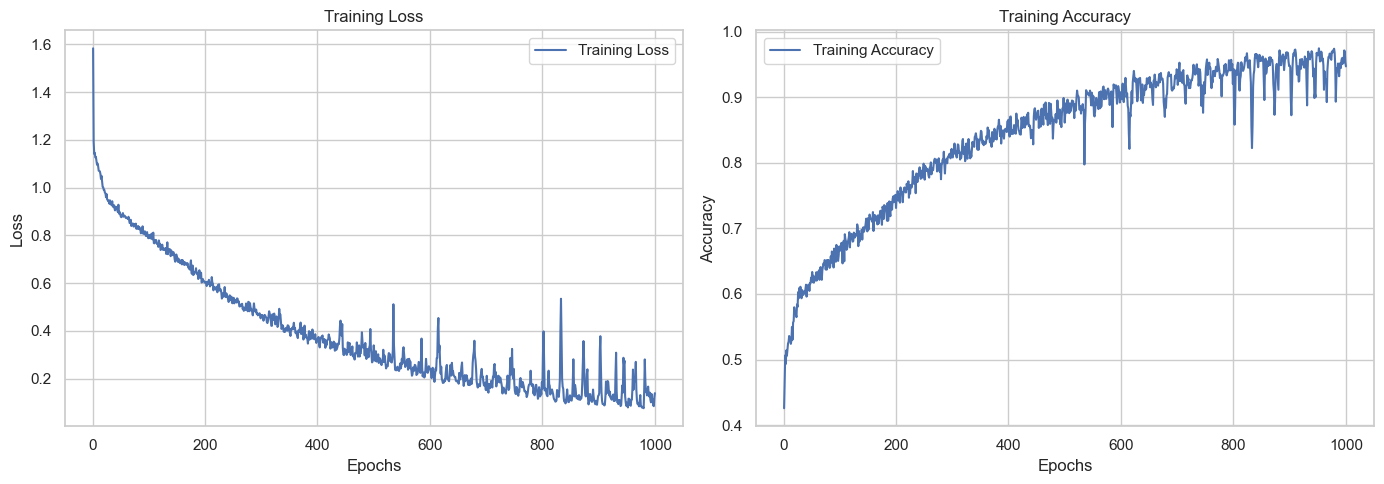

In [23]:
import matplotlib.pyplot as plt

# Extract the number of epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot training loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion
The project successfully developed and optimized multiple neural network models for predicting wine quality. Through systematic experimentation, the final model with four hidden layers and optimized neuron counts achieved an impressive accuracy of 95%. This demonstrates the potential of neural networks in handling complex classification tasks and highlights the importance of model architecture optimization in achieving high predictive performance.